In [4]:
import pandas as pd
import random 
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import TfidfVectorizer


In [5]:
data_df = pd.read_csv('newsCorpora.csv', sep='\t', header=None)
data_df.drop(data_df.columns[0], axis=1, inplace=True)
rows = list(range(len(data_df.index)))
random.shuffle(rows)
data_df = data_df.iloc[rows]
data_df = data_df.reset_index(drop=True)
data_df.head()

,1,2,3,4,5,6,7
0,Study: Pancreatic Cancer Will Be 2nd Deadliest...,http://minnesota.cbslocal.com/2014/05/19/study...,CBS Local,m,dESNNvDfkAPVrDMV7XCZMh93MSB6M,minnesota.cbslocal.com,1400589540897
1,GSK Weight Loss Products Recall: Alli Capsules...,http://www.franchiseherald.com/articles/5463/2...,Franchise Herald,m,dSqPDhIrxnVWeAMyG_uhvAEXdKLvM,www.franchiseherald.com,1396081795214
2,"London shares gain on strong US retail sales, ...",http://news.yahoo.com/london-shares-gain-stron...,Yahoo News,b,dcMA2yLhsuf1HGM43lphsqf5jGm0M,news.yahoo.com,1397509441724
3,Marvel recasts Thor as a woman,http://www.thedailystar.net/entertainment/marv...,The Daily Star,e,dqjX6McyDsvou_Mqd-zO9NDAP7J2M,www.thedailystar.net,1405573983808
4,Eurovision 2014: UK Entry Molly Admits 'Armeni...,http://www.huffingtonpost.co.uk/2014/05/09/eur...,Huffington Post UK,e,dyaHTRyzxDOk6fMoGuMjh-2X5JsQM,www.huffingtonpost.co.uk,1399701843137


In [6]:
data_df.iloc[:, 3] = data_df.iloc[:, 3].astype('category')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422419 entries, 0 to 422418
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   1       422419 non-null  object  
 1   2       422419 non-null  object  
 2   3       422417 non-null  object  
 3   4       422419 non-null  category
 4   5       422419 non-null  object  
 5   6       422419 non-null  object  
 6   7       422419 non-null  int64   
dtypes: category(1), int64(1), object(5)
memory usage: 19.7+ MB


Text(0.5, 1.0, 'Distribution of news categories')

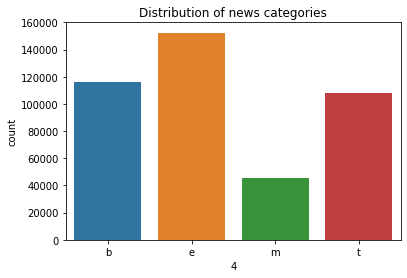

In [7]:
sns.countplot(x=data_df.iloc[:, 3], data=data_df)
plt.title('Distribution of news categories')

In [8]:
def data_processing(text):
    text = text.lower()
    text_tokens = word_tokenize(text)
    filtered_text = [word for word in text_tokens if word not in stop_words]
    stemmer = PorterStemmer()
    stemmed_text = [stemmer.stem(word) for word in filtered_text]
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = [lemmatizer.lemmatize(word) for word in stemmed_text]
    return " ".join(lemmatized_text)


In [9]:
X = data_df.iloc[:, 0].apply(data_processing)
Y = data_df.iloc[:, 3]

In [10]:
data = pd.DataFrame()
data['title'] = X
data['category'] = Y
data.category.replace({'b': 0, 't': 1, 'e': 2, 'm': 3}, inplace=True)
data['word_count'] = data['title'].apply(lambda x: len(str(x).split(" ")))
data.head()

,title,category,word_count
0,studi : pancreat cancer 2nd deadliest 2020,3,7
1,gsk weight loss product recal : alli capsul re...,3,10
2,"london share gain strong u retail sale , citi ...",0,10
3,marvel recast thor woman,2,4
4,eurovis 2014 : uk entri molli admit 'armenia b...,2,11


In [11]:
duplicate_count = data.duplicated().sum()
print("Number of duplicate rows: ", duplicate_count)

Number of duplicate rows:  21082


In [12]:
data = data.drop_duplicates('title')
data.shape

(400350, 3)

In [13]:
X = data['title']
Y = data['category']
vect = TfidfVectorizer()
X = vect.fit_transform(X)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)
# x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)
print(x_train)

  (0, 11707)	0.3887347675382524
  (0, 38586)	0.2870405333086237
  (0, 9398)	0.25479346077159587
  (0, 39123)	0.5810738127434448
  (0, 16484)	0.32368168924148927
  (0, 22272)	0.1865987690575191
  (0, 11703)	0.23439076613043877
  (0, 25041)	0.41158056492683365
  (1, 9820)	0.4647221962525406
  (1, 14687)	0.5930914443115302
  (1, 11967)	0.48812090874477726
  (1, 35048)	0.44046997337032084
  (2, 36144)	0.3940329218238088
  (2, 22926)	0.544675978641181
  (2, 5292)	0.32596830170252833
  (2, 5555)	0.3291831774196409
  (2, 7505)	0.3940801207501653
  (2, 17030)	0.2799757853598667
  (2, 5121)	0.3158538504451126
  (3, 23331)	0.430367964654932
  (3, 19297)	0.39571920271042593
  (3, 40091)	0.3815073408758027
  (3, 30959)	0.4130944017590655
  (3, 28507)	0.3633169924570342
  (3, 28756)	0.3368187177305608
  :	:
  (320275, 25063)	0.35186615067660537
  (320276, 27929)	0.5636436156422704
  (320276, 5563)	0.4407906525958927
  (320276, 4260)	0.47017464014416427
  (320276, 31816)	0.3499418089968178
  (320276

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [16]:
logreg = LogisticRegression()
ovr = OneVsRestClassifier(logreg)
ovr.fit(x_train, y_train)
ovr_pred = ovr.predict(x_test)
ovr_acc = accuracy_score(y_test, ovr_pred)
print("test accuracy: {}".format(ovr_acc))

test accuracy: 0.9408892219308106


In [17]:
print(classification_report(y_test, ovr_pred))
print("\n")
print(confusion_matrix(y_test, ovr_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92     22137
           1       0.93      0.92      0.93     20724
           2       0.96      0.98      0.97     28714
           3       0.96      0.90      0.93      8495

    accuracy                           0.94     80070
   macro avg       0.94      0.93      0.94     80070
weighted avg       0.94      0.94      0.94     80070



[[20499  1103   365   170]
 [ 1091 19149   397    87]
 [  349   247 28020    98]
 [  408   152   266  7669]]


In [18]:
from sklearn.model_selection import GridSearchCV
param_grid = {'estimator__C': [ 0.1, 1, 10, 100, 1000], 'estimator__penalty': ['l1', 'l2'], 'estimator__solver': ['liblinear', 'saga']} #, 'estimator__max_iter': [10000]}
grid = GridSearchCV(ovr, param_grid, refit=True, verbose=3)
# grid = GridSearchCV(ovr, param_grid, cv=5, scoring='accuracy')
grid.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END estimator__C=0.1, estimator__penalty=l1, estimator__solver=liblinear;, score=0.893 total time=   4.5s
[CV 2/5] END estimator__C=0.1, estimator__penalty=l1, estimator__solver=liblinear;, score=0.893 total time=   4.1s
[CV 3/5] END estimator__C=0.1, estimator__penalty=l1, estimator__solver=liblinear;, score=0.892 total time=   3.6s
[CV 4/5] END estimator__C=0.1, estimator__penalty=l1, estimator__solver=liblinear;, score=0.892 total time=   2.0s
[CV 5/5] END estimator__C=0.1, estimator__penalty=l1, estimator__solver=liblinear;, score=0.890 total time=   2.4s
[CV 1/5] END estimator__C=0.1, estimator__penalty=l1, estimator__solver=saga;, score=0.892 total time= 1.9min



KeyboardInterrupt



In [ ]:
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

NameError: name 'grid' is not defined

In [ ]:
logreg = LogisticRegression(C=1000, max_iter=10000, penalty='l2', solver='liblinear')
ovr = OneVsRestClassifier(logreg)
ovr.fit(x_train, y_train)
ovr_pred = ovr.predict(x_test)
ovr_acc = accuracy_score(y_test, ovr_pred)
print("test accuracy: {}".format(ovr_acc))

In [ ]:
print(classification_report(y_test, ovr_pred))
print("\n")
print(confusion_matrix(y_test, ovr_pred))

In [ ]:
# logreg = LogisticRegression(C=10, penalty='l2')
# logreg.fit(x_train, y_train)
# logreg_pred = logreg.predict(x_test)
# logreg_acc = accuracy_score(y_test, logreg_pred)
# print("test accuracy: {}".format(logreg_acc))


test accuracy: 0.9442737604595979


In [ ]:
# print(classification_report(y_test, logreg_pred))
# print('\n')
# print(confusion_matrix(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92     22172
           1       0.92      0.93      0.93     20433
           2       0.97      0.97      0.97     28761
           3       0.96      0.92      0.94      8704

    accuracy                           0.94     80070
   macro avg       0.94      0.94      0.94     80070
weighted avg       0.94      0.94      0.94     80070



[[20549  1146   298   179]
 [ 1052 18989   321    71]
 [  356   257 28038   110]
 [  336   158   178  8032]]
